# How To Tell a Story Using Data
My partners and I have decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so we decide to try to attract investors. The investors are interested in the current market conditions — will we be able to maintain your success when the novelty of robot waiters wears off?
It's time to prepare some market research.

We've been provided with open-source data on restaurants in LA, so all conclusions and recommendations **are based on this data only.** 



## Description of the data

`rest_data` table:
- object_name — establishment name
- chain — chain establishment (TRUE/FALSE)
- object_type — establishment type
- address — address
- number — number of seats

## Import Libraries

In [1]:
!pip install usaddress

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

In [3]:
import usaddress

In [4]:
import re

## 1. Data Preprocessing

Downloading the data and preparing it for analysis, making sure that the data type for each column is correct and that there are no missing values or duplicates.
File path: /datasets/rest_data_us.csv.

In [5]:
rest_data = pd.read_csv('/datasets/rest_data_us.csv')

In [6]:
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [7]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


ok so there are a few things to correct here.
- chain needs to be a boolean type
- number needs to be called 'seats' as it represents the number of seats
- values need to be in lower case

also we see that there are missing values in chain, so we will look at them and drop if we can not say for sure whether they are chain or not, as there are only 3 of them.

we will look for duplicates as well.

In [8]:
rest_data.rename(columns = {'number':'seats','object_name':'name', 'object_type':'type'}, inplace = True)

In [9]:
rest_data['name'] = rest_data['name'].str.title()

In [10]:
rest_data[rest_data['chain'].isnull()]

,id,name,address,chain,type,seats
7408,19194,Taqueria Los 3 Carnales,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,Jammin Jimmy'S Pizza,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,The Lexington Theater,129 E 3RD ST,NaN,Restaurant,35


In [11]:
rest_data.duplicated().sum()

0

In [12]:
rest_data = rest_data.dropna()

In [13]:
rest_data['chain'] = rest_data['chain'].astype('bool')

In [14]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       9648 non-null   int64 
 1   name     9648 non-null   object
 2   address  9648 non-null   object
 3   chain    9648 non-null   bool  
 4   type     9648 non-null   object
 5   seats    9648 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 461.7+ KB


looks better now, but let's see what's inside and if all data is correct and ready for analysis.

In [15]:
chains = rest_data.query('chain==True')
chain_group = chains.groupby('name')['seats'].agg(['count', 'sum'])
chain_group.columns = ['rest_number', 'total_seats']
chain_group = chain_group.sort_values(by='rest_number', ascending=False)
print(chain_group.head())
print(chain_group.tail())

                            rest_number  total_seats
name                                                
The Coffee Bean & Tea Leaf           47         1256
Subway                               31          509
Domino'S Pizza                       15          185
Waba Grill                           14          600
Kentucky Fried Chicken               14          467
                     rest_number  total_seats
name                                         
Jamba Juice #425               1           29
Jamba Juice #644               1           12
Jamba Juice #661               1           23
Jamba Juice #919               1           12
Zip Sushi & Izakaya            1           98


Jamba Juice branches are seperated, we need to sort it.

In [16]:
def remove_digits(name):
    name = name.replace('#', '').strip()
    name = re.sub(r'\d+', '', name).strip()  # remove all digits
    return name

rest_data['name'] = rest_data['name'].apply(lambda x: remove_digits(x))

rest_data

,id,name,address,chain,type,seats
0,11786,Habitat Coffee Shop,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,Reilly'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,Street Churros,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,Triniti Echo Park,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,Pollen,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,Hall Of Justice,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,Fin-Melrose,5750 MELROSE AVE,False,Restaurant,93
9648,21434,Juicy Wingz,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,Medidate Coffee,548 S SPRING ST STE 100,False,Cafe,6


In [17]:
rest_data['name']

0       Habitat Coffee Shop
1                  Reilly'S
2            Street Churros
3         Triniti Echo Park
4                    Pollen
               ...         
9646        Hall Of Justice
9647            Fin-Melrose
9648            Juicy Wingz
9649        Medidate Coffee
9650           Cafe Sprouts
Name: name, Length: 9648, dtype: object

In [18]:
jamba_rows = rest_data['name'].str.contains('Jamba')
jamba_names = rest_data.loc[jamba_rows, 'name']
jamba_names

149             Jamba Juice
379             Jamba Juice
775             Jamba Juice
2661            Jamba Juice
3087            Jamba Juice
3812            Jamba Juice
4750            Jamba Juice
4838            Jamba Juice
5506            Jamba Juice
6282            Jamba Juice
7008            Jamba Juice
7358            Jamba Juice
7390            Jamba Juice
7571            Jamba Juice
7812            Jamba Juice
7866            Jamba Juice
7961    Jamba Juice Company
7994            Jamba Juice
8177            Jamba Juice
9024            Jamba Juice
Name: name, dtype: object

In [19]:
rest_data['name'] = rest_data['name'].replace('Jamba Juice Company', 'Jamba Juice')

In [20]:
jamba_rows = rest_data['name'].str.contains('Jamba')
jamba_names = rest_data.loc[jamba_rows, 'name']
jamba_names

149     Jamba Juice
379     Jamba Juice
775     Jamba Juice
2661    Jamba Juice
3087    Jamba Juice
3812    Jamba Juice
4750    Jamba Juice
4838    Jamba Juice
5506    Jamba Juice
6282    Jamba Juice
7008    Jamba Juice
7358    Jamba Juice
7390    Jamba Juice
7571    Jamba Juice
7812    Jamba Juice
7866    Jamba Juice
7961    Jamba Juice
7994    Jamba Juice
8177    Jamba Juice
9024    Jamba Juice
Name: name, dtype: object

In [21]:
jamba_names.count()

20

In [22]:
rest_data.duplicated().sum()

0

In [23]:
rest_data.isna().sum()

id         0
name       0
address    0
chain      0
type       0
seats      0
dtype: int64

In [24]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       9648 non-null   int64 
 1   name     9648 non-null   object
 2   address  9648 non-null   object
 3   chain    9648 non-null   bool  
 4   type     9648 non-null   object
 5   seats    9648 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 461.7+ KB


At last, all sorted. 

## 2. Data Analysis

### 2.1 Proportions of establishments types

In [25]:
type_counts = rest_data['type'].value_counts()
type_perc = type_counts / len(rest_data) * 100
type_perc

Restaurant    75.176202
Fast Food     11.048922
Cafe           4.508706
Pizza          3.306385
Bar            3.026534
Bakery         2.933250
Name: type, dtype: float64

In [26]:
type_counts

Restaurant    7253
Fast Food     1066
Cafe           435
Pizza          319
Bar            292
Bakery         283
Name: type, dtype: int64

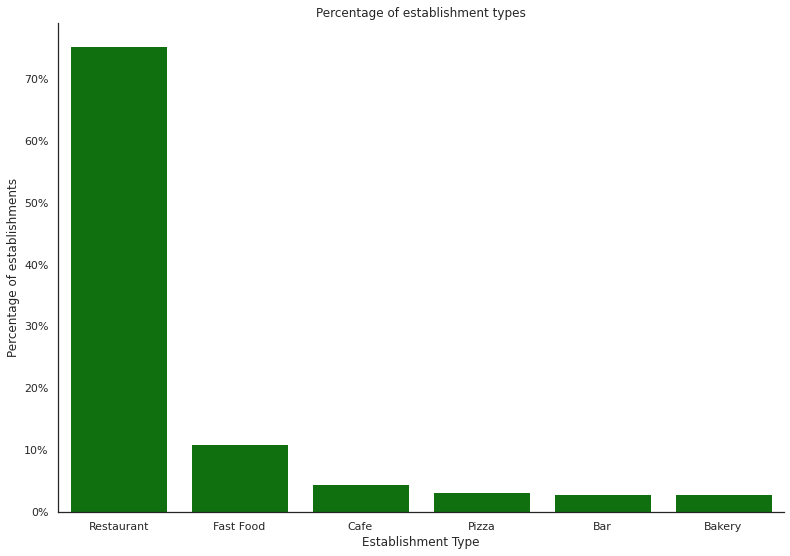

In [35]:
sns.set(style="white", rc={"figure.figsize":(13,9)})
ax= sns.barplot(x=type_perc.index, y=type_perc.values, color="Green")
plt.title('Percentage of establishment types')
plt.xlabel('Establishment Type')
plt.ylabel('Percentage of establishments')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
sns.despine();

Restaurant is our leading establishment in LA, as it holds 75% of them establishments! After that it's 11% fastfood and 4.5% cafes. seems pretty reasonable, but we will not give up on our idea just now.

### 2.2 Chain vs. Non-Chain Establishments

In [36]:
chain_counts = rest_data['chain'].value_counts()

In [37]:
chain_counts

False    5972
True     3676
Name: chain, dtype: int64

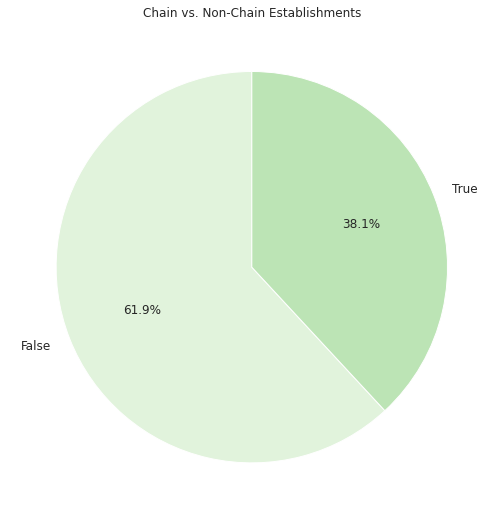

In [41]:
plt.figure(figsize=(13,9))
plt.title('Chain vs. Non-Chain Establishments')
sns.set_palette('Greens')
plt.pie(chain_counts.values, labels=chain_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12});

Most of the establishments in LA are non-chain.

### 2.3 Which type of establishment is typically a chain?

In [72]:
pivot = pd.pivot_table(rest_data, index='type', values='chain')
pivot['chain'] = pivot['chain'] * 100
pivot['Non-chain Percentage'] = 100 - (pivot['chain'])
pivot = pivot.sort_values(by='chain', ascending=False)
pivot = pivot.rename(columns={'chain': 'Chain Percentage'})

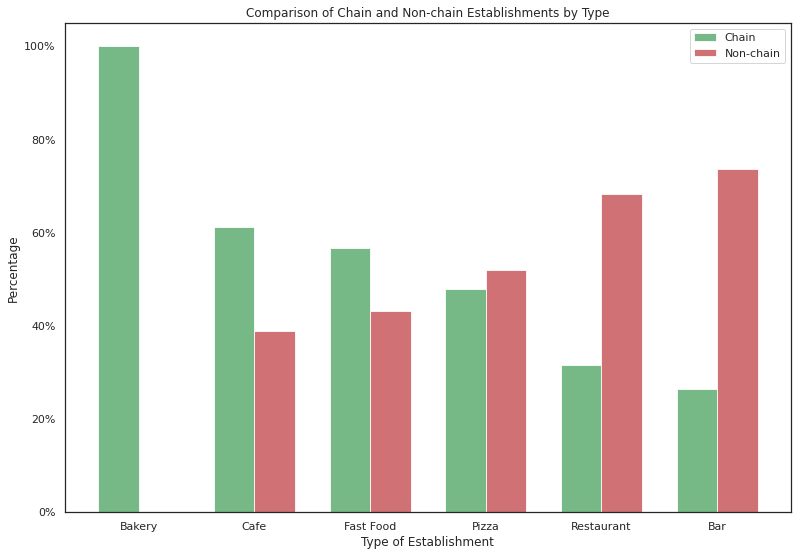

In [77]:
fig, ax = plt.subplots(figsize=(13, 9))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(pivot.index))

chains = ax.bar(index, pivot['Chain Percentage'], bar_width, alpha=opacity, color='g', label='Chain')
non_chains = ax.bar(index + bar_width, pivot['Non-chain Percentage'], bar_width, alpha=opacity, color='r', label='Non-chain')

ax.set_xlabel('Type of Establishment')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Chain and Non-chain Establishments by Type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(pivot.index)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
ax.legend();


So bakeries are 100% chains, which is interesting, as you would expect them to be family-owned or so. cafes and fast food are behind with about 60% which is decents. restaurants and bars are lower than 40% chains, and that makes sense.

### 2.4 What characterizes chains?

In [40]:
rest_data.loc[rest_data['chain']==True]['seats'].describe()

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: seats, dtype: float64

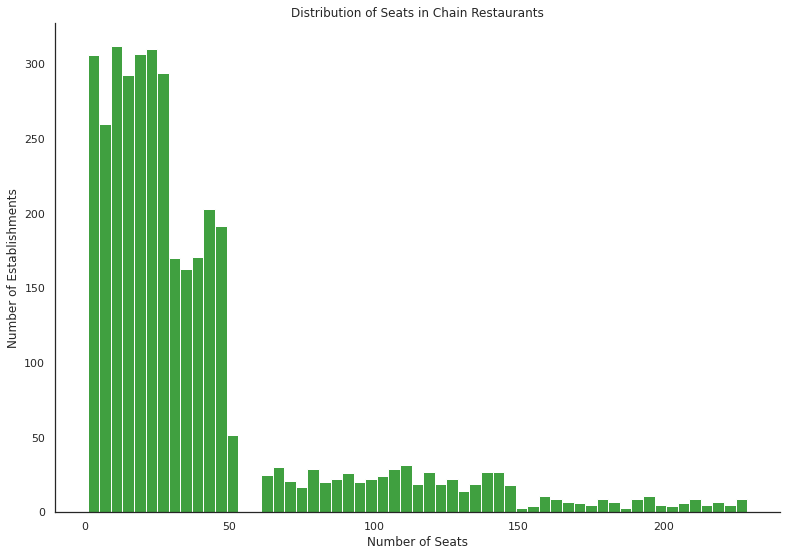

In [123]:
sns.set_style("white")
plt.figure(figsize=(13,9))
# sns.violinplot(data=rest_data.loc[rest_data['chain']==True], x='seats', y='type', color='green', inner="quartile")
sns.histplot(data=rest_data.loc[rest_data['chain']==True], x='seats', color='green')
plt.title('Distribution of Seats in Chain Restaurants')
plt.xlabel('Number of Seats')
plt.ylabel('Number of Establishments')
sns.despine();

In [268]:
chains_df = rest_data.query('chain == True').groupby('name').agg({'id':'count', 'seats':'mean'}).reset_index()
chains_df.columns = ['name', 'number_of_restaurants', 'average_number_of_seats']

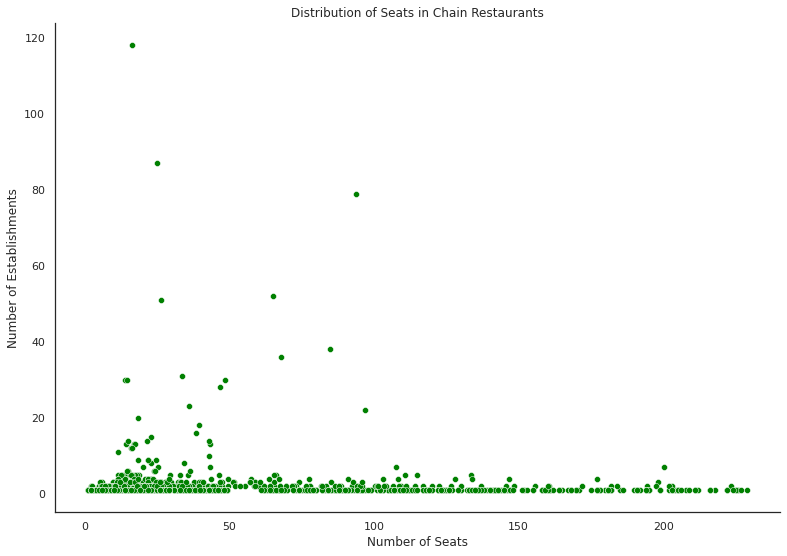

In [271]:
sns.set_style("white")
plt.figure(figsize=(13,9))
sns.scatterplot(y='number_of_restaurants', x='average_number_of_seats', data=chains_df, color='green')
plt.title('Distribution of Seats in Chain Restaurants')
plt.xlabel('Number of Seats')
plt.ylabel('Number of Establishments')
sns.despine();

Most of chain establishments have between 1-50 seats.
Half of them have at least 25 seats.
I assume it makes sense because as seen before bakeries, cafes and fast food are most likely to be branches of chains and most likely to have a fewer number of seats. we will see next if that was correct, but still from this plot we can say that **chains are characterised by having many establishments with a small number of seats.**

### 2.5 Average number of seats for each type of restaurant. 

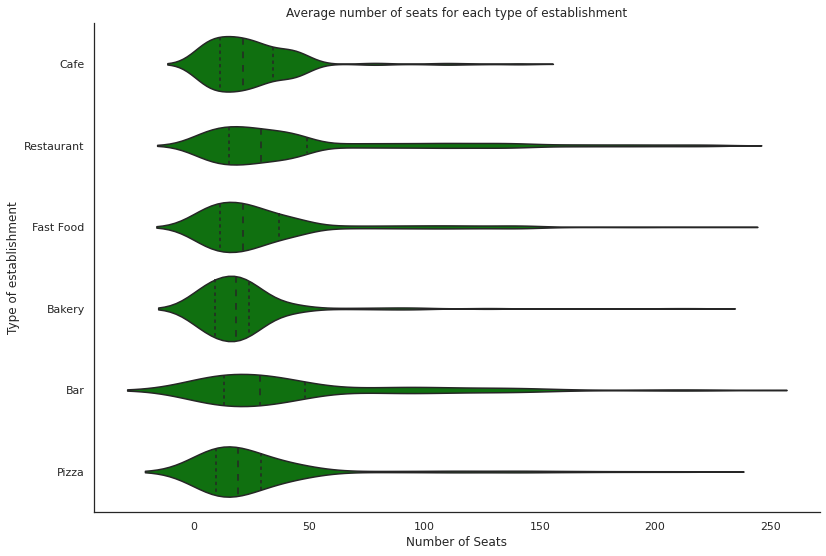

In [131]:
plt.figure(figsize=(13,9))
plt.title('Average number of seats for each type of establishment')
ax= sns.violinplot(y='type', x='seats', data=rest_data, color='green', inner='quartile')
plt.ylabel('Type of establishment')
plt.xlabel('Number of Seats')
sns.despine();

As I was thinking earlier, bakeries, cafes and fast food would have fewer seats because of their business nature - grabbing something quickly, takeouts - compared to restaurants and bars, that are more for gathering of large parties and family celebrations.

### 2.6 Put the data on street names from the `address` column in a separate column.

In [132]:
def street_tag(raw):
    try:
        street_tag=usaddress.tag(raw)[0]['StreetName']
    except: 
        street_tag = 'no street'
    return street_tag

In [133]:
rest_data['street_name']=rest_data.address.apply(street_tag)
rest_data.head()

,id,name,address,chain,type,seats,street_name
0,11786,Habitat Coffee Shop,3708 N EAGLE ROCK BLVD,False,Cafe,26,EAGLE ROCK
1,11787,Reilly'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD
2,11788,Street Churros,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD
3,11789,Triniti Echo Park,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET
4,11790,Pollen,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK


In [134]:
rest_data['street_name'] = rest_data['street_name'].str.title()

In [135]:
rest_data[rest_data['street_name']=='No Street'].sort_values(by='address')

,id,name,address,chain,type,seats,street_name
7003,18789,D.K. Donuts,1033 1/2 LOS ANGELES ST,False,Fast Food,8,No Street
4673,16459,L' Express Presto,110 E 9TH ST ST B LOB#2,False,Fast Food,18,No Street
9129,20915,Midori Matcha Cafe,123 ASTRONAUT E S ONIZUKA ST # 101C,False,Restaurant,9,No Street
9058,20844,Torigoya,123 ASTRONAUT E S ONIZUKA ST STE 203,False,Restaurant,34,No Street
8208,19994,Kokekokko,123 ASTRONAUT E S ONIZUKA ST STE 203,False,Restaurant,43,No Street
8996,20782,Sandwich Shop Little Tokyo,123 ASTRONAUT E. S. ONIZUKA ST,False,Restaurant,8,No Street
8988,20774,Teashot,123 ASTRONAUT E. S. ONIZUKA ST,False,Restaurant,20,No Street
9256,21042,Hisaya Kyoto Chestnuts Cafe,123 E ASTRONAUT E S ONIZUKA ST #108,False,Restaurant,24,No Street
6088,17874,Dan'S Deli,300 S GRAND AVENUE LOW PLAZA 35,True,Restaurant,18,No Street
1805,13591,El Gallo,3425 E 1ST ST SO. 3RDFL,False,Restaurant,44,No Street


In [136]:
len(rest_data[rest_data['street_name']=='No Street'])

17

In [137]:
rest_data.loc[rest_data['address'].str.startswith('OLVERA'), 'street_name'] = 'Olvera'
rest_data.loc[rest_data['address'].str.startswith('123 ASTRONAUT'), 'street_name'] = 'Astronaut'
rest_data.loc[rest_data['street_name']=='No Street', 'street_name'] = 'Other'
rest_data[rest_data['street_name']=='No Street'].sort_values(by='address')

,id,name,address,chain,type,seats,street_name


In [138]:
rest_data['street_name'].nunique()

480

We have 480 streets in our dataset.

### 2.7 Top ten streets by number of restaurants.

In [197]:
streets = rest_data.groupby('street_name').agg({'id': 'count', 'seats':'sum'}).reset_index()
streets.columns = ['street', 'venues', 'seats']
streets = streets.sort_values(by='venues', ascending=False)
top_10_streets = streets.head(10)
top_10_streets.sort_values(by='seats', ascending=False)
top_10_streets['venues'].sum()

3254

The top ten streets are home to about 44% of all establishments. nice

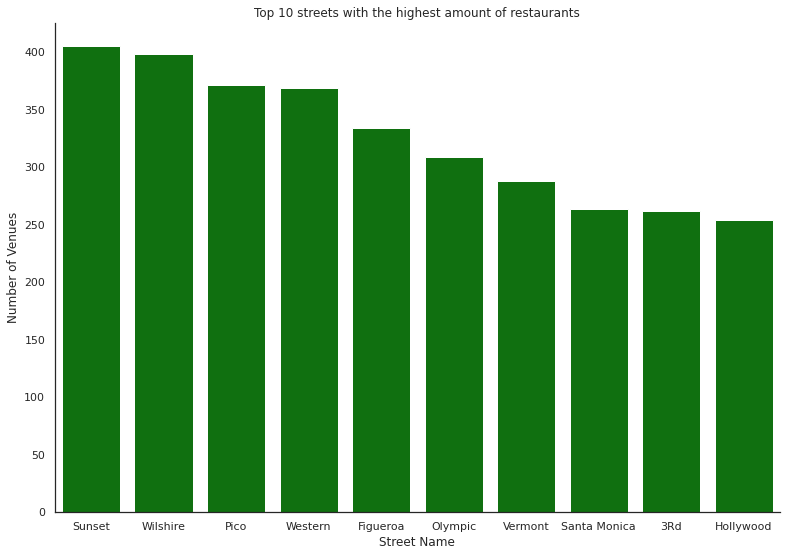

In [192]:
plt.figure(figsize=(13,9))
ax= sns.barplot(data=top_10_streets, x='street', y='venues', color='green')
ax.set_title('Top 10 streets with the highest amount of restaurants')
ax.set_xlabel('Street Name')
ax.set_ylabel('Number of Venues')
sns.despine();

All streets host between 300-400 restaurants.

### 2.8 One restaurant Streets

In [181]:
street_counts = rest_data.groupby('street_name').size().reset_index(name='restaurant_count')
one_restaurant_streets = street_counts[street_counts['restaurant_count'] == 1]['street_name'].tolist()
len(one_restaurant_streets)

192

There are 192 streets that only have one restaurant.

### 2.9 Trends of number of seats in streets with a lot of restaurants

In [220]:
top10 = rest_data.query('street_name in @top_10_streets["street"]')
top10

,id,name,address,chain,type,seats,street_name
2,11788,Street Churros,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,Hollywood
3,11789,Triniti Echo Park,1814 W SUNSET BLVD,False,Restaurant,22,Sunset
10,11796,El Pollo Loco,5319 W SUNSET BLVD,True,Restaurant,38,Sunset
11,11797,Poong Nyun Bakery,928 S WESTERN AVE STE 109,True,Bakery,17,Western
14,11800,Cuscatleca Bakery,2501 W SUNSET BLVD #A,True,Bakery,26,Sunset
...,...,...,...,...,...,...,...
9634,21420,Mild Sauce,8500 W OLYMPIC BLVD STE B,False,Restaurant,15,Olympic
9635,21421,The Tea & Coffee Exchange,6801 HOLLYWOOD BLVD # 120,False,Cafe,4,Hollywood
9639,21425,Mcdonald'S,1800 S WESTERN AVE,True,Fast Food,135,Western
9645,21431,Saint Marc,10250 SANTA MONICA BLVD # 1025,False,Restaurant,225,Santa Monica


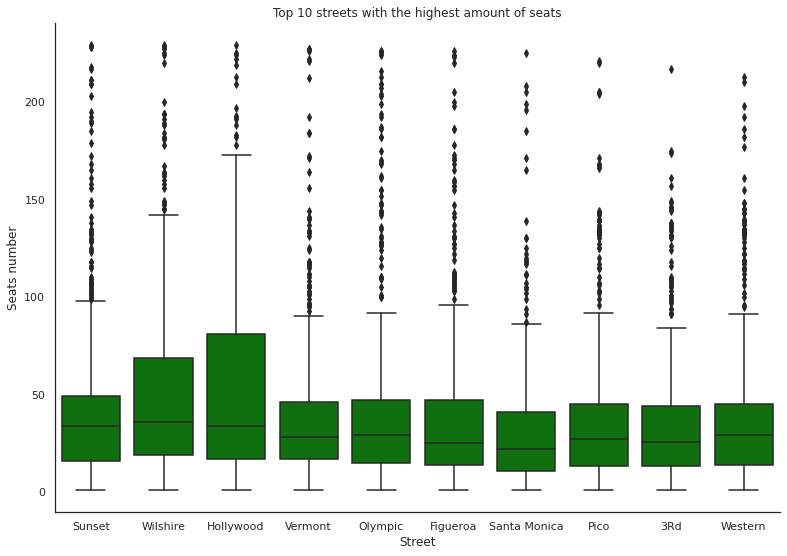

In [230]:
plt.figure(figsize=(13,9))
ax = sns.boxplot(x='street_name', y='seats', data=top10.sort_values(by='seats', ascending=False), color='Green')
ax.set_title('Top 10 streets with the highest amount of seats')
ax.set_xlabel('Street')
ax.set_ylabel('Seats number')
sns.despine();

The restaurants in the leading streets have between 40-60 seats on average, with **Hollywood** having the largest number out of them, and **Wilshire** just after it.

### 2.10 Overall conclusion and recommendations 

**Market Research on LA Establishments:**

We have studied a dataset that includes 9648 establishments all across Los Angeles, 75% of them are restaurants.
Only 4.15% are cafes.
62% of all establishments are non-chains and 38% are chains.
Restaurants and bars are mostly nonchain and have many seats, Fast food and cafes are more often part of chain and have fewer seats, because of their business natures.
Most establishments have up to 50 seats.
The most popular streets are Sunset, Wilshire, Pico, Western, Figueroa, Vermont, Olympic, Santa Monica, 3rd and Hollywood.

**Recommendations on opening a small robot-run cafe in Los Angeles:**

**Open a restaurant, in the city center, with around 30 seats, that could become a chain with time.**
Unfortunately, cafes are not a big hit in LA as they take about 4% of the establishments, so we can open instead a bistro-restaurant with the robots experience already discussed. For its location, we should choose one of the popular streets, as they are most probably the main streets of tourists, which can attract more traffic towards the exclusive restaurant. For L.A locations, I don't reckon we should open more than one restaurant in the city, but once successful, we can open branches for other cities across the country and even overseas.

## 3. Presentation

Presentation: https://drive.google.com/file/d/1ABK1KXBKbBhY3CBDEKzMDdyuk_79ApeG/view?usp=sharing